In [ ]:
import tensorflow as tf
import numpy as np
import os

from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from numpy import expand_dims

import matplotlib.pyplot as plt


#global

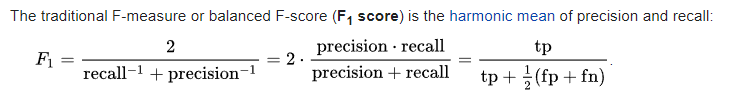

In [ ]:
#=========================================================================================================================
#======================= NEURAL NETWORK PERFORMANCE MEASURES
#=========================================================================================================================
# 3.3 :: define performance evaluation functions

def get_performance(conf_matrix):
    #how many classes? = len of conf_matril
    nos_class = len(conf_matrix[0,:]) # len of 0th row
    res = np.zeros((0,9),dtype ='float64')
    for i in range(0,nos_class):
        # for each class calculate 4 performance measure - ACC, PRE, SEN, SPF, 
        # first compute TP, TN, FP, FN
        TP = conf_matrix[i,i]
        FP = np.sum(conf_matrix[:,i]) - TP
        FN = np.sum(conf_matrix[i,:]) - TP
        TN = np.sum(conf_matrix) - FN - FP - TP

        ACC = (TP+TN)   /   (TP+FP+FN+TN)
        PRE = (TP)      /   (TP+FP)
        SEN = (TP)      /   (TP+FN)
        SPF = (TN)      /   (TN+FP)
        F1S = (TP)      /   (TP + (FP+FN)*0.5)

        res_i = np.array([TP, FN, FP, TN, ACC, PRE, SEN, SPF, F1S])
        res = np.vstack((res,res_i))
    return res


#------------------------------------------------------------------PRINTING

def print_lstr(class_labels):
    g_LSTR=''   # HEADER ROW for printing confusing matrix
    for i in range(0,len(class_labels)):
        g_LSTR+='\t'+str(class_labels[i])
    return  g_LSTR

def print_cf_row(cf_row,nos_labels):
    res = ''
    for j in range(0,nos_labels):
        res += '\t'+ str(cf_row[j])
    return res
def print_conf_matrix(conf_matrix, suffix, class_labels):
    res=(suffix+'A\\P ' + print_lstr(class_labels)+'\n')
    nos_l=len(class_labels)
    for i in range(0,nos_l):
        res+=(suffix+str(class_labels[i]) + print_cf_row(conf_matrix[i],nos_l )+'\n')
    return res
def print_performance(perf_measures, class_labels):
    nos_class = len(perf_measures[:,0])

    print('Performance for '+str(nos_class)+' classes')
    print ('Class    \tACC\tPRE\tSEN\tSPF\tF1S\tALL\tT.P\tF.N\tF.P\tT.N')
    for i in range(0, nos_class):
        perf_i = np.round(perf_measures[i,:],2)
        print(str(class_labels[i])+'\t'+str(perf_i[4])+'\t'+str(perf_i[5])+'\t'+str(perf_i[6])+'\t'+str(perf_i[7])+'\t'+str(perf_i[8]) + \
              '\t'+str(np.sum(perf_i[0:2]))+'\t'+str(perf_i[0])+'\t'+str(perf_i[1]), '\t'+str(perf_i[2])+'\t'+str(perf_i[3])
              
              )
    return
#------------------------------------------------------------------


# Loading Models

In [ ]:
path_to_dirs = [
               '/content/drive/MyDrive/trained_models_vgg/fold_0',
               '/content/drive/MyDrive/trained_models_vgg/fold_1',
               '/content/drive/MyDrive/trained_models_vgg/fold_2',
               '/content/drive/MyDrive/trained_models_vgg/fold_3',
               '/content/drive/MyDrive/trained_models_vgg/fold_4',
              ] 

models = [ tf.saved_model.load(path_to_dir) for path_to_dir in path_to_dirs ]

signatures = []
for model in models:
  signatures.extend(list(model.signatures.keys()))

{'dense_1': TensorSpec(shape=(None, 4), dtype=tf.float32, name='dense_1')}
[<tf.Tensor 'input_1:0' shape=(None, 224, 224, 3) dtype=float32>, <tf.Tensor 'statefulpartitionedcall_args_1:0' shape=<unknown> dtype=resource>, <tf.Tensor 'statefulpartitionedcall_args_2:0' shape=<unknown> dtype=resource>, <tf.Tensor 'statefulpartitionedcall_args_3:0' shape=<unknown> dtype=resource>, <tf.Tensor 'statefulpartitionedcall_args_4:0' shape=<unknown> dtype=resource>, <tf.Tensor 'statefulpartitionedcall_args_5:0' shape=<unknown> dtype=resource>, <tf.Tensor 'statefulpartitionedcall_args_6:0' shape=<unknown> dtype=resource>, <tf.Tensor 'statefulpartitionedcall_args_7:0' shape=<unknown> dtype=resource>, <tf.Tensor 'statefulpartitionedcall_args_8:0' shape=<unknown> dtype=resource>, <tf.Tensor 'statefulpartitionedcall_args_9:0' shape=<unknown> dtype=resource>, <tf.Tensor 'statefulpartitionedcall_args_10:0' shape=<unknown> dtype=resource>, <tf.Tensor 'statefulpartitionedcall_args_11:0' shape=<unknown> dtype

In [ ]:
#infers = [model.signatures["serving_default"] for model in models ]
infers = [model.signatures[signature] for model,signature in zip(models,signatures) ]
def shape2size(s):
  r = 1
  for i in s:
    r*=i
  return r
for infer in infers:
  print('-----------------------')
  print(infer.structured_outputs)
  print(infer.inputs)
  t = [shape2size(i.shape) for i in infer.trainable_variables]

  print( sum(t) )
  #print(type(infer.trainable_variables), len(infer.trainable_variables),)

-----------------------
{'dense_1': TensorSpec(shape=(None, 4), dtype=tf.float32, name='dense_1')}
[<tf.Tensor 'input_1:0' shape=(None, 224, 224, 3) dtype=float32>, <tf.Tensor 'statefulpartitionedcall_args_1:0' shape=<unknown> dtype=resource>, <tf.Tensor 'statefulpartitionedcall_args_2:0' shape=<unknown> dtype=resource>, <tf.Tensor 'statefulpartitionedcall_args_3:0' shape=<unknown> dtype=resource>, <tf.Tensor 'statefulpartitionedcall_args_4:0' shape=<unknown> dtype=resource>, <tf.Tensor 'statefulpartitionedcall_args_5:0' shape=<unknown> dtype=resource>, <tf.Tensor 'statefulpartitionedcall_args_6:0' shape=<unknown> dtype=resource>, <tf.Tensor 'statefulpartitionedcall_args_7:0' shape=<unknown> dtype=resource>, <tf.Tensor 'statefulpartitionedcall_args_8:0' shape=<unknown> dtype=resource>, <tf.Tensor 'statefulpartitionedcall_args_9:0' shape=<unknown> dtype=resource>, <tf.Tensor 'statefulpartitionedcall_args_10:0' shape=<unknown> dtype=resource>, <tf.Tensor 'statefulpartitionedcall_args_11:

## [infer properties]

In [ ]:
"""
'add_gradient_functions_to_graph',
 'add_to_graph',
 'captured_inputs',
 'function_def',
 'graph',
 'inputs',
 'name',
 'output_dtypes',
 'output_shapes',
 'outputs',
 'pretty_printed_signature',
 'replace_capture_with_deferred_capture',
 'set_external_captures',
 'structured_input_signature',
 'structured_outputs',
 'trainable_variables',
 'variables']
 """
 

# Loading Data

In [ ]:
IMG_SIZE = 224
train_folder = "/content/drive/MyDrive/train_test_val_ultrasound/train"
test_folder = '/content/drive/MyDrive/train_test_val_ultrasound/test'
val_folder = '/content/drive/MyDrive/train_test_val_ultrasound/val'

train_c = os.path.join(train_folder, 'COVID-19')
train_n = os.path.join(train_folder , 'normal')

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range=0.2, height_shift_range=0.1,width_shift_range=0.1,fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)


train_set = train_datagen.flow_from_directory(train_folder, target_size =(224,224),batch_size=1, class_mode='categorical')
test_set = test_datagen.flow_from_directory(test_folder, target_size=(224,224),batch_size=1, class_mode='categorical')
val_set = test_datagen.flow_from_directory(val_folder, target_size=(224,224),batch_size=1, class_mode='categorical')

Found 2633 images belonging to 3 classes.
Found 749 images belonging to 3 classes.
Found 374 images belonging to 3 classes.


In [ ]:
"""
for i,v in enumerate(val_set):
  print(i,len(v), v[0].shape, v[1].shape)
  break
"""

# Map labels

In [ ]:
our_labels =   ['0-Covid   ', '1-Normal  ', '2-Pneumonia']
their_labels = ['0-Covid', '1-Pneumonia', '2-Healthy', '3-Uninformative']
label_map={
    #their:  our
    0:      0,
    1:      2,
    2:      1,
    3:      -1,
}

# perform Testing

In [ ]:


cmat = [ np.zeros((len(our_labels),len(our_labels)),dtype='int32') for _ in range(len(infers)) ]
ytrues = [ [] for _ in range(len(infers)) ]
yhats = [ [] for _ in range(len(infers)) ]

#for all_set in [test_set]: # [train_set, test_set, val_set]:
all_set=val_set
max_samples = len(all_set)-1
verbose=0
do_plot=False

print('\n++++\n')
print('Test samples:', max_samples+1,'of',len(all_set))
print('\n++++\n')


for z,(x,y) in enumerate(all_set):
  truth_class = np.argmax(y[0])

  #if do_plot:
  #  plt.figure()
  #  plt.imshow(x[0])
  #  plt.title('Sample:'+ str(z)+'::'+str(y)+'::'+str(our_labels[truth_class]))
  #  plt.show()

  
  labelings = [infer(tf.constant(x)) for infer in infers]   #[pretrained_model.output_names[0]]
  #if verbose>0:
  #  print('Sample:'+ str(z), 'True Class:', str(y), str(our_labels[truth_class]))

  
  for i,labeling in enumerate(labelings):
    
    predicted = labeling['dense_1'].numpy()
    pred_class = np.argmax(predicted[0])
    assert(pred_class!=3) #<-------------any uninformative samples?
    mapped_class = label_map[pred_class]
    #if verbose>0:
    #  print('fold_'+str(i),
    #      '[predicted-class]',their_labels[pred_class],
    #      '[mapped-class]',our_labels[mapped_class] if mapped_class>=0 else 'None',)
    #  print('==============================================')

    ytrues[i].append(truth_class)
    yhats[i].append(mapped_class)
    cmat[i][truth_class, mapped_class]+=1  # true class / pred class
  # end for
  

  if z==max_samples: 
    break




++++

Test samples: 374 of 374

++++



# Performance

In [ ]:
for i,conf_matrix in enumerate(cmat):
  print('\n==================Confusion Matrix FOLD_[', i, ']')
  print(print_conf_matrix( conf_matrix,'', our_labels)) #logit('\t'+str(cmx))
  print_performance( get_performance(conf_matrix) ,our_labels ) 


==================Confusion Matrix FOLD_[ 0 ]
A\P 	0-Covid   	1-Normal  	2-Pneumonia
0-Covid   	101	30	0
1-Normal  	0	78	34
2-Pneumonia	5	0	126

Performance for 3 classes
Class    	ACC	PRE	SEN	SPF	F1S	ALL	T.P	F.N	F.P	T.N
0-Covid   	0.91	0.95	0.77	0.98	0.85	131.0	101.0	30.0 	5.0	238.0
1-Normal  	0.83	0.72	0.7	0.89	0.71	112.0	78.0	34.0 	30.0	232.0
2-Pneumonia	0.9	0.79	0.96	0.86	0.87	131.0	126.0	5.0 	34.0	209.0

==================Confusion Matrix FOLD_[ 1 ]
A\P 	0-Covid   	1-Normal  	2-Pneumonia
0-Covid   	119	12	0
1-Normal  	34	44	34
2-Pneumonia	0	0	131

Performance for 3 classes
Class    	ACC	PRE	SEN	SPF	F1S	ALL	T.P	F.N	F.P	T.N
0-Covid   	0.88	0.78	0.91	0.86	0.84	131.0	119.0	12.0 	34.0	209.0
1-Normal  	0.79	0.79	0.39	0.95	0.52	112.0	44.0	68.0 	12.0	250.0
2-Pneumonia	0.91	0.79	1.0	0.86	0.89	131.0	131.0	0.0 	34.0	209.0

==================Confusion Matrix FOLD_[ 2 ]
A\P 	0-Covid   	1-Normal  	2-Pneumonia
0-Covid   	129	2	0
1-Normal  	34	44	34
2-Pneumonia	0	0	131

Performance for 3 classes



[FOLD_0]
              precision    recall  f1-score   support

           0       0.95      0.77      0.85       131
           1       0.72      0.70      0.71       112
           2       0.79      0.96      0.87       131

    accuracy                           0.82       374
   macro avg       0.82      0.81      0.81       374
weighted avg       0.83      0.82      0.81       374



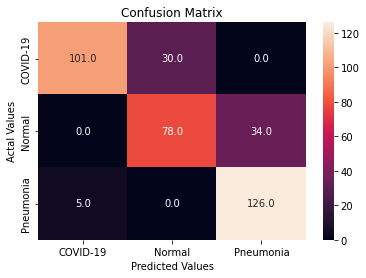

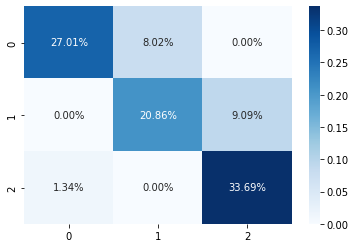



[FOLD_1]
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       131
           1       0.79      0.39      0.52       112
           2       0.79      1.00      0.89       131

    accuracy                           0.79       374
   macro avg       0.79      0.77      0.75       374
weighted avg       0.79      0.79      0.76       374



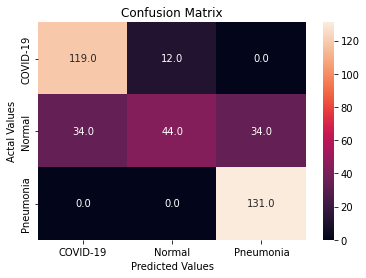

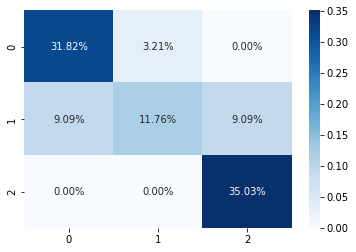



[FOLD_2]
              precision    recall  f1-score   support

           0       0.79      0.98      0.88       131
           1       0.96      0.39      0.56       112
           2       0.79      1.00      0.89       131

    accuracy                           0.81       374
   macro avg       0.85      0.79      0.77       374
weighted avg       0.84      0.81      0.78       374



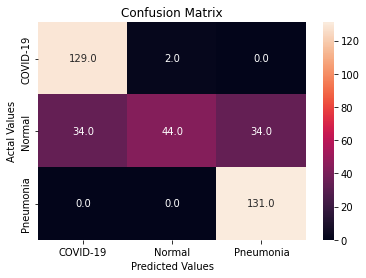

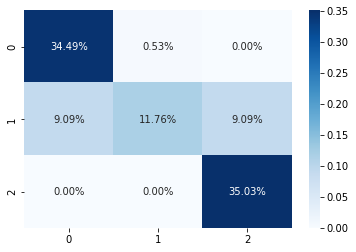



[FOLD_3]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       131
           1       0.89      0.66      0.76       112
           2       0.79      1.00      0.89       131

    accuracy                           0.87       374
   macro avg       0.88      0.86      0.86       374
weighted avg       0.88      0.87      0.87       374



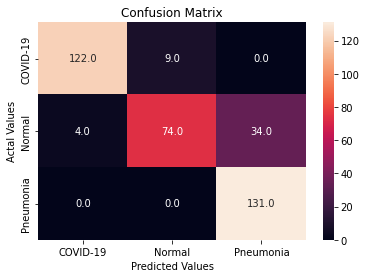

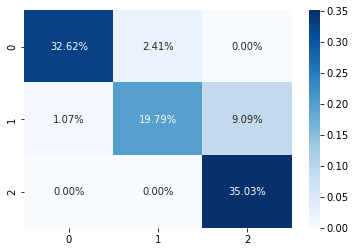



[FOLD_4]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       131
           1       0.92      0.54      0.69       112
           2       0.79      1.00      0.89       131

    accuracy                           0.85       374
   macro avg       0.87      0.84      0.83       374
weighted avg       0.86      0.85      0.84       374



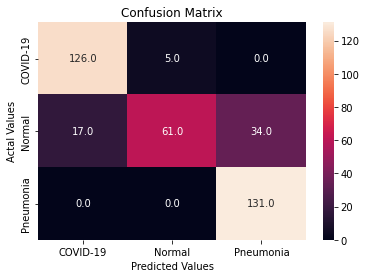

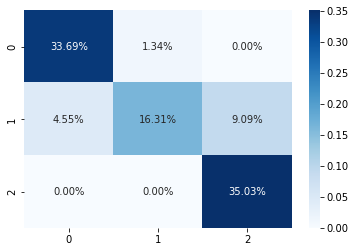

In [ ]:
#import sklearn.metrics
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
fold=0


for y_true, y_hat in zip(ytrues, yhats):
  ytest, yhat = y_true, y_hat
  print('\n\n[FOLD_'+str(fold)+']')
  print(classification_report(ytest, yhat))
  cf_matrix = confusion_matrix(ytest, yhat)
  #
  ax= plt.subplot()
  sns.heatmap(cf_matrix, annot = True, ax=ax,fmt = ".1f")
  plt.ylabel('Actal Values')
  plt.xlabel('Predicted Values')
  ax.set_title('Confusion Matrix'); 
  ax.xaxis.set_ticklabels(['COVID-19', 'Normal', 'Pneumonia']); ax.yaxis.set_ticklabels(['COVID-19', 'Normal', 'Pneumonia']);
  # our_labels =   ['0-Covid   ', '1-Normal  ', '2-Pneumonia']
  plt.show()

  sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
              fmt='.2%', cmap='Blues')
  plt.show()
  
  fold+=1



# test unit input

In [ ]:
"""
x = np.ones((1, 224, 224, 3)).astype(np.float32)

labelings = [infer(tf.constant(x)) for infer in infers]   #[pretrained_model.output_names[0]]

for labeling in labelings:
  result = labeling['dense_1'].numpy()
  print(result.shape, result )
#decoded = imagenet_labels[np.argsort(labeling)[0,::-1][:5]+1]

#print("Result after saving and loading:\n", decoded)
"""